# **Food Demand Forecasting**

In [0]:
# Importamos las librerias 
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

##2. Pre-Procesamiento de datos

In [307]:
!mkdir data
!wget "https://drive.google.com/uc?export=download&id=1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP" -O data/fulfilment_center_info.csv
!wget "https://drive.google.com/uc?export=download&id=19v-eC9LKjbAH0DMqQpi8Sb0XVxnNm9uq" -O data/meal_info.csv
!wget "https://drive.google.com/uc?export=download&id=1-zCbExblslglkus85ZCTNWwDh3TiEgkl" -O data/test.csv
!wget "https://drive.google.com/uc?export=download&id=1DZj2egxfzXYltmL_1M_atDHXMwz6IsR_" -O data/train.csv

mkdir: cannot create directory ‘data’: File exists
--2020-04-10 23:34:46--  https://drive.google.com/uc?export=download&id=1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP
Resolving drive.google.com (drive.google.com)... 74.125.143.139, 74.125.143.113, 74.125.143.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.143.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t8no254ona13548jn0jcb932tujji669/1586561625000/01100318546325464434/*/1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP?e=download [following]
--2020-04-10 23:34:46--  https://doc-0c-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t8no254ona13548jn0jcb932tujji669/1586561625000/01100318546325464434/*/1EG9_l6a5rRlTSzEwlNijqLuY7bxW_iuP?e=download
Resolving doc-0c-00-docs.googleusercontent.com (doc-0c-00-docs.googleusercontent.com)... 108.177.119.132, 2a00:1450:4013:c00::84
Connec

###2.1. Información del conjunto de entrenamiento

In [0]:
# Cargamos los datos 
fulfilment_center_info = pd.read_csv('data/fulfilment_center_info.csv')
meal_info = pd.read_csv('data/meal_info.csv')
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [309]:
# Mostramos los primeros datos de entrenamiento
print("Total de registros Train set: ", train.shape)
train.head()

Total de registros Train set:  (456548, 9)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


###2.2. Información del conjunto de pruebas

In [310]:
# Mostramos los primeros datos de pruebas
print("Total de registros Test set: ", test.shape)
test.head()

Total de registros Test set:  (32573, 8)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


###2.3. Información de los centros y comidas

In [311]:
# Mostramos primeros datos de los centros
print(fulfilment_center_info.shape)
fulfilment_center_info.head()

(77, 5)


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


###2.4. Verificación de datos faltantes

In [312]:
# Verificamos si hay valores nulos en el conjunto de entrenamiento
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [313]:
# Verificamos si hay valores nulos en centros
fulfilment_center_info.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [314]:
# Verificamos si hay valores nulos en comidas
meal_info.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

###2.5. Combinamos la data de entrenamiento, centros y comidas

In [0]:
# Juntamos los datos en un solo archivo (NUEVO)
train = pd.merge(train, fulfilment_center_info, how='inner', left_on='center_id', right_on='center_id')
train = pd.merge(train, meal_info, how='inner', left_on='meal_id', right_on='meal_id')
train['label'] = 'train'

test = pd.merge(test, fulfilment_center_info, how='inner', left_on='center_id', right_on='center_id')
test = pd.merge(test, meal_info, how='inner', left_on='meal_id', right_on='meal_id')
test['label'] = 'test'

dataset = pd.concat([train, test])

###2.6. Eliminación de columnas

In [0]:
# Eliminanos 'id' (NUEVO)
ids = dataset[dataset['num_orders'].isna()][['id', 'label']]
train.drop(['id'], axis=1, inplace =True)
test.drop(['id'], axis=1, inplace=True)
dataset.drop(['id'], axis=1, inplace=True)

###2.7. Análisis de variables y Visualizaciones

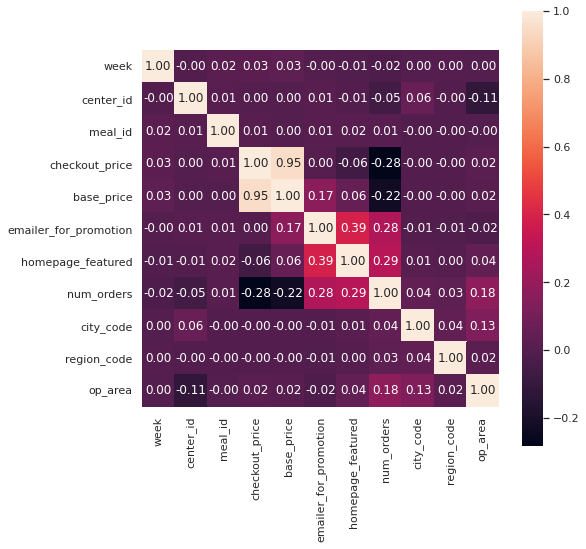

In [317]:
# Creación de correlación
plt.figure(figsize=(8, 8))
correlation = train.corr(method='pearson')
sns.heatmap(correlation, cbar=True, annot=True,square=True ,fmt='.2f')

En el gráfico se puede apreciar que hay una correlación alta entre las variables ***checkout_price*** y ***base_price*** (0.95), por lo cual nos quedaremos con ***checkout_price*** ya que contiene el precio total (impuestos, descuentos y costo de envío)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

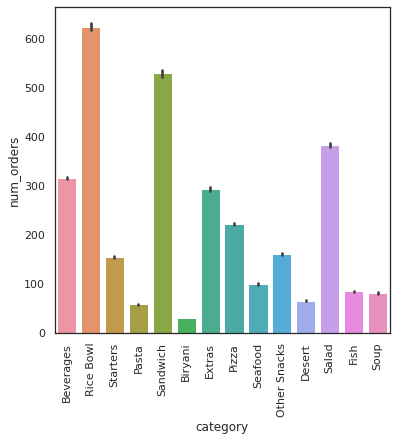

In [318]:
# Visualización de Categorías vs Número de ordenes
plt.figure(figsize=(6, 6))
sns.barplot(train['category'], train['num_orders'])
plt.xticks(rotation = 90)

Podemos visualizar que las tres categorías más solicitadas son ***rice bowl*** , ***sandwich*** y ***salad***

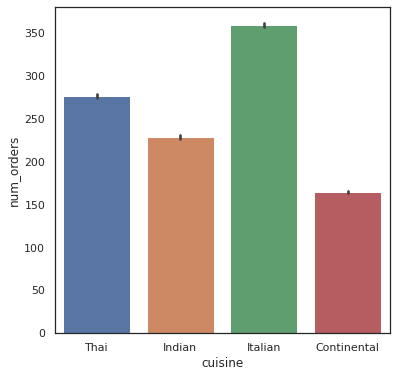

In [319]:
# Visualización de Cocinas vs Número de ordenes
plt.figure(figsize=(6, 6))
sns.barplot(train['cuisine'], train['num_orders'])

Podemos visualizar que la cocina que prefieren los consumidores de esta empresa es la ***Italiana***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

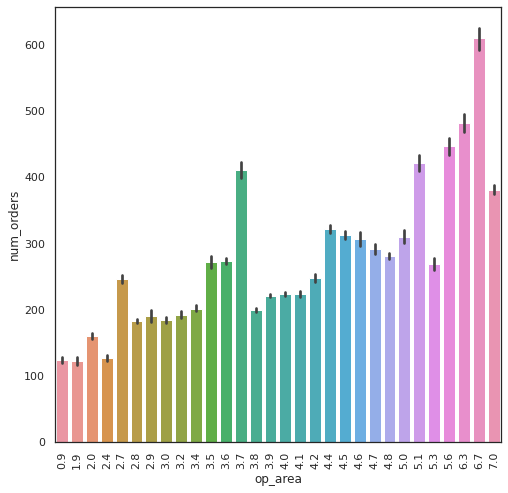

In [320]:
# Visualización de Área de operación vs Número de ordenes
plt.figure(figsize=(8, 8))
sns.barplot(train['op_area'], train['num_orders'])
plt.xticks(rotation = 90)

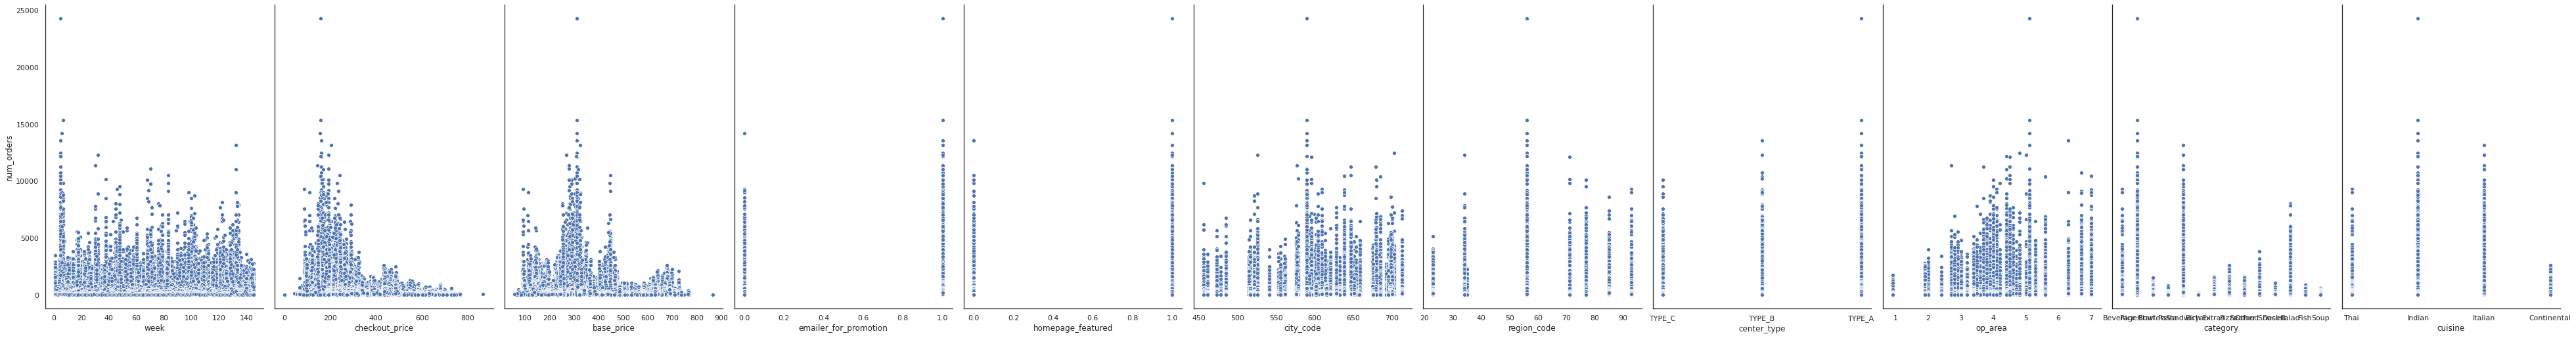

In [321]:
# Visualizamos las variables vs target
p = sns.pairplot(train, x_vars=['week','checkout_price','base_price','emailer_for_promotion','homepage_featured','city_code','region_code','center_type','op_area','category','cuisine'], y_vars='num_orders', height=7, aspect=0.7)

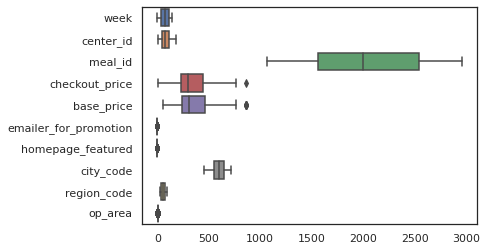

In [322]:
# Visualizamos el boxplot de las variables.
sns.boxplot(data=train.drop(columns=["num_orders"]), orient="h")

###2.8. Eliminación de outliers

In [0]:
# Como se pudo visualizar en el pairplot, tenemos un outlier cuyo valor
# aproximado en número de pedidos es mayor a 15000
dataset = dataset[((dataset['num_orders'] < 15000) | (dataset['num_orders'].isna()))]

In [324]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489119 entries, 0 to 32572
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   week                   489119 non-null  int64  
 1   center_id              489119 non-null  int64  
 2   meal_id                489119 non-null  int64  
 3   checkout_price         489119 non-null  float64
 4   base_price             489119 non-null  float64
 5   emailer_for_promotion  489119 non-null  int64  
 6   homepage_featured      489119 non-null  int64  
 7   num_orders             456546 non-null  float64
 8   city_code              489119 non-null  int64  
 9   region_code            489119 non-null  int64  
 10  center_type            489119 non-null  object 
 11  op_area                489119 non-null  float64
 12  category               489119 non-null  object 
 13  cuisine                489119 non-null  object 
 14  label                  489119 non-nul

###2.10. Escalamiento de datos

In [0]:
# Obtenemos la columnas númericas
numeric_cols = [col for col in dataset.columns \
              if pd.api.types.is_numeric_dtype(dataset[col]) and 
              col != 'num_orders' and 
              col != 'checkout_price' and
              col != 'base_price']

# Realizamos el escalamiento de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset[numeric_cols])

for col, scaled_data in zip(numeric_cols, X_scaled.T):
  dataset[col] = scaled_data

In [326]:
# Aplicando diferente escala para algunas columnas
dataset['checkout_price'] = np.log1p(dataset['checkout_price'])
dataset['base_price'] = np.log1p(dataset['base_price'])
dataset['num_orders'] = np.log1p(dataset['num_orders'])
dataset.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,label
0,-1.777298,-0.589306,-0.255478,4.926021,5.032332,-0.295222,-0.346771,5.181784,0.686717,-0.035205,TYPE_C,-1.908014,Beverages,Thai,train
1,-1.754746,-0.589306,-0.255478,4.918739,5.032332,-0.295222,-0.346771,5.780744,0.686717,-0.035205,TYPE_C,-1.908014,Beverages,Thai,train
2,-1.732195,-0.589306,-0.255478,4.897243,4.904682,-0.295222,-0.346771,4.574711,0.686717,-0.035205,TYPE_C,-1.908014,Beverages,Thai,train
3,-1.709643,-0.589306,-0.255478,4.918959,4.911625,-0.295222,-0.346771,5.099866,0.686717,-0.035205,TYPE_C,-1.908014,Beverages,Thai,train
4,-1.687092,-0.589306,-0.255478,4.993828,5.000585,-0.295222,-0.346771,5.375278,0.686717,-0.035205,TYPE_C,-1.908014,Beverages,Thai,train


In [327]:
# Verificamos que el valor de la media sea 0 y la desviación estandar 1.
dataset.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.891190e+05,4.891190e+05,4.891190e+05,489119.000000,489119.000000,4.891190e+05,4.891190e+05,456546.000000,4.891190e+05,4.891190e+05,4.891190e+05
mean,6.043669e-16,1.613612e-14,-6.518158e-14,5.701240,5.767823,2.701313e-13,-6.512470e-14,4.888168,-1.250311e-14,-1.370801e-15,7.777777e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,0.480930,0.468949,1.000001e+00,1.000001e+00,1.203124,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.777298e+00,-1.568133e+00,-1.758924e+00,1.378766,4.031582,-2.952216e-01,-3.467706e-01,2.639057,-2.199235e+00,-1.905814e+00,-2.915190e+00
25%,-8.526896e-01,-8.503263e-01,-8.528375e-01,5.433766,5.499215,-2.952216e-01,-3.467706e-01,4.007333,-7.335942e-01,-1.282278e+00,-4.430304e-01
50%,2.681554e-02,-1.325195e-01,-5.818532e-02,5.706313,5.744380,-2.952216e-01,-3.467706e-01,4.919981,-8.387725e-02,-3.520530e-02,-7.678454e-02
75%,8.612178e-01,6.070391e-01,9.392402e-01,6.100835,6.130846,-2.952216e-01,-3.467706e-01,5.783825,7.471561e-01,1.155182e+00,3.810228e-01
max,1.695620e+00,2.260170e+00,1.701010e+00,7.016269,7.015371,3.387286e+00,2.883751e+00,9.563108,1.683957e+00,2.062144e+00,2.670060e+00


###2.9. Creación de dummies

In [0]:
# Creamos los dummies del conjunto de datos
# 1. Convertimos todas las columnas a categóricas.
for n, col in dataset.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'num_orders':
        # Transforma la variable a tipo category
        dataset[n] = col.astype('category')
    
df = dataset.copy()

# 2. Convertir cada columna categórica a numérica.
for n,col in df.items():
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1

# 3. Creamos los valores dummies.
X = pd.get_dummies(dataset.drop(['num_orders'], axis=1), drop_first=True)

In [0]:
X_train = (X[dataset['label'] == 'train']).drop(['label_train'], axis=1)
Y_train = dataset[dataset['label'] == 'train']['num_orders']

# Predicción
X_test = (X[dataset['label'] == 'test']).drop(['label_train'], axis=1)
Y_test = dataset[dataset['label'] == 'test']['num_orders']

In [330]:
X_train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,-1.777298,-0.589306,-0.255478,4.926021,5.032332,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-1.754746,-0.589306,-0.255478,4.918739,5.032332,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-1.732195,-0.589306,-0.255478,4.897243,4.904682,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.709643,-0.589306,-0.255478,4.918959,4.911625,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-1.687092,-0.589306,-0.255478,4.993828,5.000585,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### 2.10. Visualización de correlación

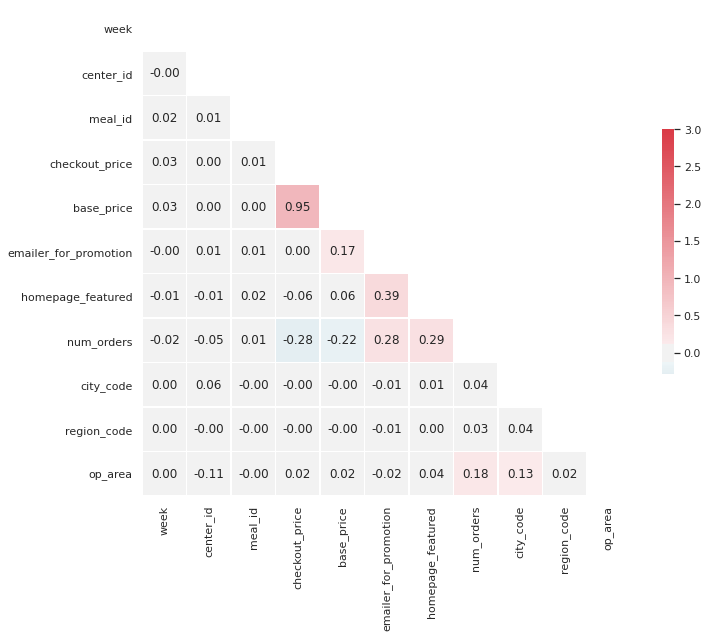

In [331]:
mask = np.ones_like(correlation, dtype=np.bool)
mask = np.triu(mask)
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=3., annot=True, fmt='.2f', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

##5. Visualización e Interpretación de resultados

In [332]:
X_train.corr()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
week,1.000000,-0.003456,0.019818,0.027470,0.021018,-0.000817,-0.008243,0.000403,0.004599,0.001556,0.009278,-0.004501,-0.008558,-0.004501,-0.004190,0.114409,-0.000550,-0.015445,-0.010520,-0.011051,0.053558,-0.010445,-0.008292,-0.000995,-0.014200,-0.014755,0.008291,-0.015935
center_id,-0.003456,1.000000,0.009895,-0.001936,-0.003429,0.013671,-0.005032,0.061077,-0.003426,-0.111866,-0.091956,-0.061088,-0.002604,0.004250,-0.051971,-0.003596,0.004672,0.004989,0.007296,0.007127,0.006638,0.007238,0.001414,-0.045336,0.000265,0.007043,0.014692,-0.029823
meal_id,0.019818,0.009895,1.000000,0.017950,0.004521,0.013395,0.016349,-0.003197,-0.001662,-0.001548,0.004091,-0.008087,-0.156270,0.035379,-0.185007,0.033455,0.154998,-0.075666,0.005602,-0.162006,0.260414,0.080985,0.084959,-0.032146,0.159468,-0.156293,0.096025,0.125013
checkout_price,0.027470,-0.001936,0.017950,1.000000,0.955751,0.010732,-0.065454,-0.004063,-0.000537,0.023267,0.021606,-0.025169,0.185494,0.203451,-0.201993,0.207271,-0.082356,0.134856,0.384867,0.018709,-0.018471,-0.020910,0.366129,-0.102985,-0.039404,0.053387,-0.117088,-0.478599
base_price,0.021018,-0.003429,0.004521,0.955751,1.000000,0.149118,0.031399,-0.000531,0.001873,0.020894,0.017214,-0.021583,0.169975,0.209626,-0.169930,0.201122,-0.088122,0.150403,0.416659,0.026270,-0.035464,-0.026857,0.389913,-0.116482,-0.065190,0.079230,-0.137267,-0.508870
emailer_for_promotion,-0.000817,0.013671,0.013395,0.010732,0.149118,1.000000,0.390508,-0.005231,-0.007461,-0.019477,-0.005056,0.008608,-0.064623,-0.018762,-0.051998,-0.037237,-0.056589,0.014170,0.206923,0.011494,-0.007735,0.049500,0.094463,-0.050218,-0.034304,-0.052218,0.011155,-0.117782
homepage_featured,-0.008243,-0.005032,0.016349,-0.065454,0.031399,0.390508,1.000000,0.008643,0.003606,0.041487,0.001884,-0.030595,-0.074106,0.004821,-0.050422,-0.033492,0.045821,0.022976,0.107393,-0.018657,-0.039196,0.004288,0.025728,-0.038731,-0.030737,-0.059394,-0.049730,0.040791
city_code,0.000403,0.061077,-0.003197,-0.004063,-0.000531,-0.005231,0.008643,1.000000,0.042686,0.131477,0.004381,0.088260,-0.006409,-0.005043,0.025785,-0.000484,-0.001230,-0.005636,-0.003940,-0.003895,-0.003912,-0.003723,0.002864,0.038829,-0.004886,-0.008285,-0.009569,0.020252
region_code,0.004599,-0.003426,-0.001662,-0.000537,0.001873,-0.007461,0.003606,0.042686,1.000000,0.023328,-0.055865,0.017814,0.001080,-0.005579,0.018054,-0.014187,0.003160,-0.005467,-0.003024,-0.002913,-0.002485,-0.003063,-0.000111,0.033747,-0.003075,-0.004475,-0.007721,0.021114
op_area,0.001556,-0.111866,-0.001548,0.023267,0.020894,-0.019477,0.041487,0.131477,0.023328,1.000000,0.358995,-0.392960,0.041362,-0.000534,0.034732,0.038476,0.005215,0.007302,-0.023328,-0.024747,-0.019907,-0.022846,0.017974,0.062501,0.008053,0.006199,-0.034671,0.031985


In [333]:
X_test.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1.492657,-0.589306,-0.255478,5.069596,5.075861,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.515209,-0.589306,-0.255478,5.075861,5.075861,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.560312,-0.589306,-0.255478,5.063481,5.069784,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.582863,-0.589306,-0.255478,5.076048,5.063481,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.605414,-0.589306,-0.255478,5.082087,5.075861,-0.295222,-0.346771,0.686717,-0.035205,-1.908014,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Decision Tree's

In [334]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y_train
x = X_train

base_score, train_scores, val_scores, train_rmse, val_rmse = [], [], [], [], []
model = DecisionTreeRegressor(max_depth = 20)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    y_val[:]=Y.mean()
    base_score.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))

print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Base Line Compare = {np.mean(base_score):.4}')

Score Promedio
Train      = 0.8937
Validation = 0.7887
RMSE Promedio
Train      = 0.3922
Validation = 0.553
Base Line Compare = 1.139


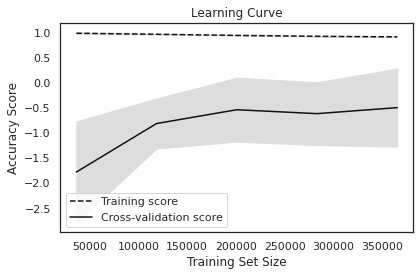

In [335]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        X_train, 
                                                        Y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [336]:
#Probamos eliminando algunas columnas con información similar.
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y_train
x = X_train.drop(['meal_id','center_id','city_code','region_code'],axis=1)

train_scores, val_scores, train_rmse, val_rmse = [], [], [], []
model = DecisionTreeRegressor(max_depth = 10)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    
print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')

Score Promedio
Train      = 0.7001
Validation = 0.6955
RMSE Promedio
Train      = 0.6589
Validation = 0.6639


# Random Forest - Regresión

In [337]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

y = Y_train
x = X_train

base_score, train_scores, val_scores, train_rmse, val_rmse = [], [], [], [], []
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    y_val[:]=Y.mean()
    base_score.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Base Line Compare = {np.mean(base_score):.4}')

#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

Score Promedio
Train      = 0.9781
Validation = 0.8431
RMSE Promedio
Train      = 0.1781
Validation = 0.4766
Base Line Compare = 1.123


# Gradient Boosting Regression

In [338]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
kfolds = KFold(n_splits=5, shuffle=True)

y = Y_train
x = X_train

base_score, train_scores, val_scores, train_rmse, val_rmse = [], [], [], [], []

model = GradientBoostingRegressor(loss='ls',
                                n_estimators=200, max_depth=8,
                                learning_rate=0.1, min_samples_leaf=8,
                                min_samples_split=8)

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    model.fit(x_train, y_train)
    train_scores.append(model.score(x_train, y_train))
    val_scores.append(model.score(x_val, y_val))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,model.predict(x_train))))
    val_rmse.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
    y_val[:]=Y.mean()
    base_score.append(np.sqrt(mean_squared_error(y_val,model.predict(x_val))))
print(f'Score Promedio')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')
print(f'RMSE Promedio')
print(f'Train      = {np.mean(train_rmse):.4}')
print(f'Validation = {np.mean(val_rmse):.4}')
print(f'Base Line Compare = {np.mean(base_score):.4}')

Score Promedio
Train      = 0.8584
Validation = 0.8471
RMSE Promedio
Train      = 0.4528
Validation = 0.4704
Base Line Compare = 1.084


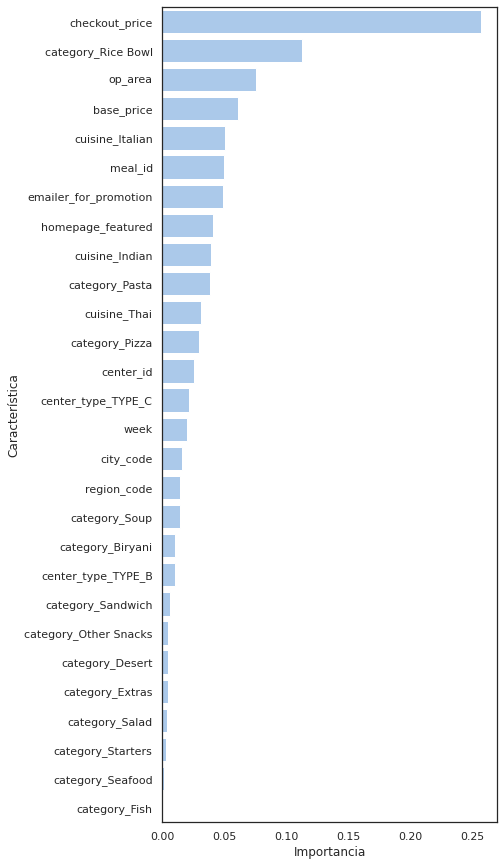

In [358]:
importances = pd.DataFrame({ 'importance': model.feature_importances_ })
importances['feature'] = x.columns
importances_sorted = importances.sort_values(by='importance', ascending=False)

f, ax = plt.subplots(figsize=(6, 15))
fig =sns.barplot(x='importance',
                 y='feature', 
                 data=importances_sorted, 
                 label="Importancia de Características", 
                 color="b")

plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show(fig)

In [0]:
# Predicción
y_pred = model.predict(X_test)
predictions = pd.DataFrame({'id': ids['id'], 
                           'num_orders': np.expm1(y_pred)})
predictions.to_csv('submission.csv', index=False)